In [1]:
import os
os.chdir('..\\') # in ./tests folder - so changing to parent folder for imports
from consts import FOLDER2FLOW_RESULTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class df_extra:    
    def __init__(self, df):
        self.df = df
        self.num_rows = df.shape[0]
        self.data_dict = {}

    def add_data_to_df(self, col_name, data):
        self.data_dict[col_name] = [data]*self.num_rows
        self.df[col_name] = data

def print_means(df, evals):
    mus = ["0.4", "0.5", "0.6"]
    for _eval in evals:
            for mu in mus:
                for algo in df.algo.unique():
                    algo_rows = df.loc[df["algo"]==algo].loc[df["mu"]==mu]
                    avg = algo_rows[_eval].mean()
                    print(f"avg for: {algo}, {mu}, {_eval}:\t {avg}")
    return

def create_united_df(date_folder, timelimit=600): # This is a df of all networks in folder
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, date_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)
        _df_extra.add_data_to_df("mu", network.split("_")[1])

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    
    # replace names to shorter names for readabilty
    df["algo"].replace(f"NLP-100-TL-{timelimit}", "NLP100", inplace=True)
    df["algo"].replace(f"NLP-150-TL-{timelimit}", "NLP150", inplace=True)
    df["algo"].replace(f"NLP-200-TL-{timelimit}", "NLP200", inplace=True)
    
    df["algo"].replace(f"LLP-100", "LLP100", inplace=True)
    df["algo"].replace(f"louvain-ILP-num_com_bound 150", "LLP150", inplace=True)
    df["algo"].replace(f"louvain-ILP-num_com_bound 200", "LLP200", inplace=True)
    
    return df

def run_visu(input_folder):
    df = create_united_df(input_folder)
    return df

def run_visu_benchmark(input_folder):
    res_dp = os.path.join(FOLDER2FLOW_RESULTS, input_folder)
    dfs_list = []
    for network in sorted(os.listdir(res_dp), reverse=True):
        df_fp = os.path.join(res_dp, network, "results.df")
        if network.endswith(".log") or not os.path.exists(df_fp):
            continue
        df = pd.read_pickle(df_fp)

        _df_extra = df_extra(df)
        _df_extra.add_data_to_df("network", network)

        dfs_list.append(df)
    df = pd.concat(dfs_list)
    df.reset_index(inplace=True)
    del df["index"]
    return df

def create_bar_graphs_benchmark(df, evals, title="Graph"):
    for eval in evals:
        name = f"{title}-{eval}"
        ax = sns.barplot(x="network", y=eval, hue="algo", data=df).set(title=name)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

def create_bar_graphs(df, evals, title="Graph"):
    for eval in evals:
        name = f"{title}-{eval}"
        sns_plot = sns.barplot(x="mu", y=eval, hue="algo", data=df).set(title=name)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()


def print_times(df):
    # mus = ["0.4", "0.5", "0.6"]
    # for mu in mus:
        for algo in df.algo.unique():
            algo_rows = df.loc[df["algo"]==algo]
            avg = algo_rows["time-sec"].mean()
            print(f"avg time for: {algo} :\t {avg}")
        return

evals=["modularity - algo", "jaccard","graph_accuracy","graph_conductance",
       ]
evals2 =["modularity - algo", "jaccard","graph_accuracy","graph_conductance",
       "number_of_mega_nodes_before_split","number_of_mega_nodes"
       ]


# ILP formulations


1. 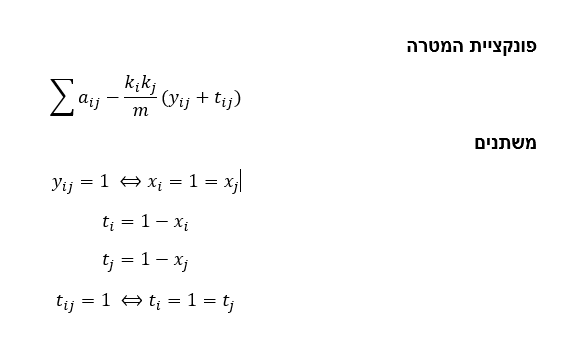

avg 1.25 min for 40 nodes graph (10 graphs)

2. 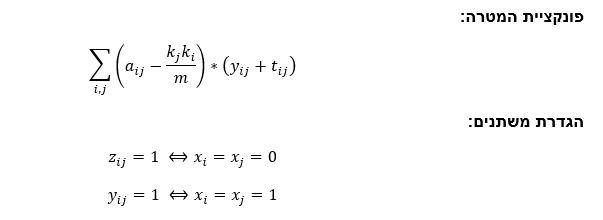

avg 1.9 min for 40 nodes graph (10 graphs)

3.  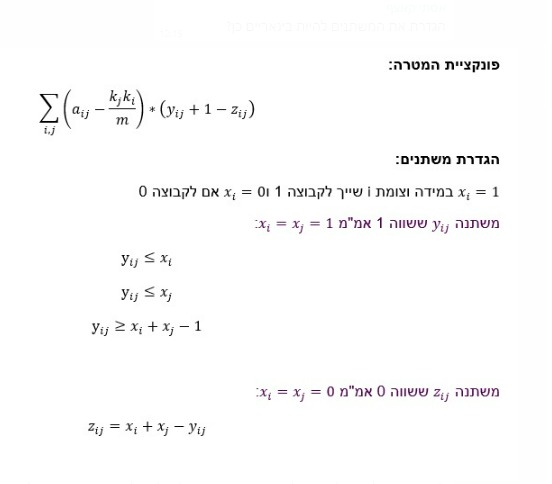
avg 25  sec for 40 nodes graph (10 graphs)

# sub graph taken in consideration in split

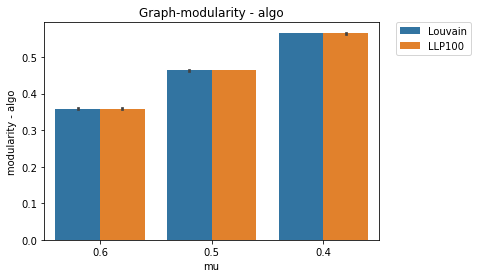

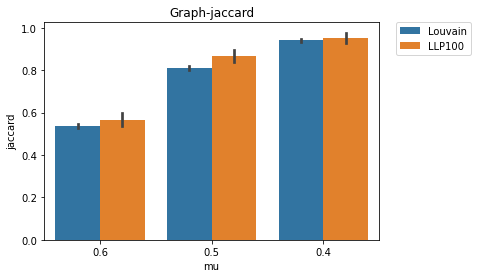

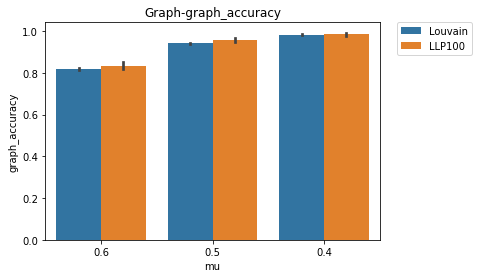

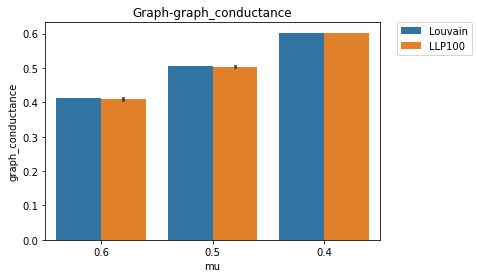

avg for: Louvain, 0.4, modularity - algo:	 0.565153677872334
avg for: LLP100, 0.4, modularity - algo:	 0.5653975313742273
avg for: Louvain, 0.5, modularity - algo:	 0.4632353193483958
avg for: LLP100, 0.5, modularity - algo:	 0.4643251733211902
avg for: Louvain, 0.6, modularity - algo:	 0.35894471168521747
avg for: LLP100, 0.6, modularity - algo:	 0.35899172263525914
avg for: Louvain, 0.4, jaccard:	 0.9399979060907238
avg for: LLP100, 0.4, jaccard:	 0.9531472571999415
avg for: Louvain, 0.5, jaccard:	 0.8122218608200469
avg for: LLP100, 0.5, jaccard:	 0.8645664257623429
avg for: Louvain, 0.6, jaccard:	 0.5363621934001543
avg for: LLP100, 0.6, jaccard:	 0.5656035164058423
avg for: Louvain, 0.4, graph_accuracy:	 0.9817885159974903
avg for: LLP100, 0.4, graph_accuracy:	 0.9852761651720016
avg for: Louvain, 0.5, graph_accuracy:	 0.9415385770064079
avg for: LLP100, 0.5, graph_accuracy:	 0.9575275739468342
avg for: Louvain, 0.6, graph_accuracy:	 0.8200479329470501
avg for: LLP100, 0.6, graph_

In [3]:
input_folder = "20-06-2022--23-28-11-louvain-with-newman-split-1-000 sub graph"
df = run_visu(input_folder)
create_bar_graphs(df,evals)
print_means(df, evals)
print_times(df)
# display(df)

# whole graph taken in consideration in split

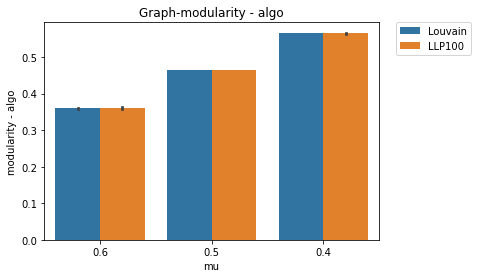

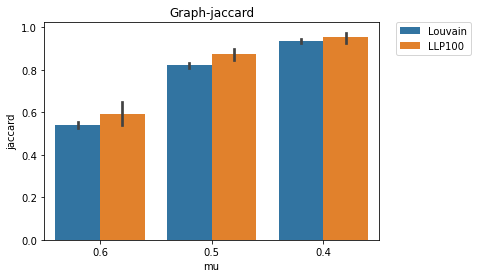

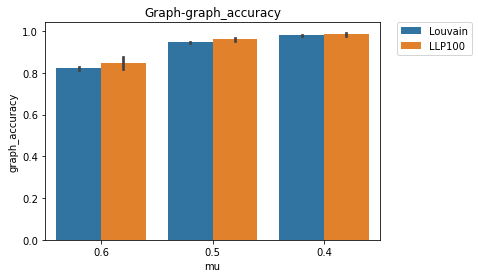

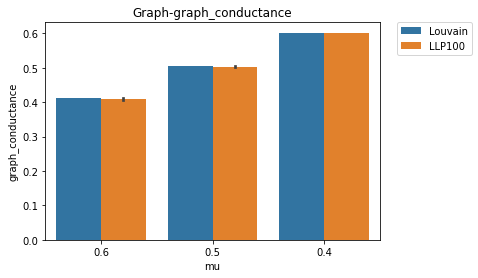

avg for: Louvain, 0.4, modularity - algo:	 0.5651143276182332
avg for: LLP100, 0.4, modularity - algo:	 0.5653975313742274
avg for: Louvain, 0.5, modularity - algo:	 0.46358537733197536
avg for: LLP100, 0.5, modularity - algo:	 0.4644487497746928
avg for: Louvain, 0.6, modularity - algo:	 0.3591788088906027
avg for: LLP100, 0.6, modularity - algo:	 0.36051080255637075
avg for: Louvain, 0.4, jaccard:	 0.9349527106582595
avg for: LLP100, 0.4, jaccard:	 0.9531472571999415
avg for: Louvain, 0.5, jaccard:	 0.8222347050841207
avg for: LLP100, 0.5, jaccard:	 0.8747213856833633
avg for: Louvain, 0.6, jaccard:	 0.5405337478381088
avg for: LLP100, 0.6, jaccard:	 0.5947758898066742
avg for: Louvain, 0.4, graph_accuracy:	 0.9804188755057016
avg for: LLP100, 0.4, graph_accuracy:	 0.9852761651720016
avg for: Louvain, 0.5, graph_accuracy:	 0.9455262479329005
avg for: LLP100, 0.5, graph_accuracy:	 0.9605911455352165
avg for: Louvain, 0.6, graph_accuracy:	 0.8226327444312577
avg for: LLP100, 0.6, graph

In [5]:
input_folder1 = "21-06-2022--11-07-58-louvain-with-newman-split-1-000 whole graph"
input_folder = "21-06-2022--17-07-33-louvain-with-newman-split-_whole_graph-1-000"
df = run_visu(input_folder)
create_bar_graphs(df,evals)
print_means(df, evals2)
print_times(df)
# display(df)